# DATA PROCESSING FOR MACHINE LEARNING

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore", message="Found unknown categories")

In [2]:
#load dataset
adverts = pd.read_csv('/Users/benny/Downloads/adverts.csv')

In [3]:
#check dataset columns and rows
adverts.head(5)

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid
1,202007020778260,108230.0,61,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel
2,202007020778474,7800.0,17,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
3,202007080986776,45000.0,16,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel
4,202007161321269,64000.0,64,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel


In [4]:
#check for the number of columns and rows in the dataset
adverts.shape

(402005, 12)

In [5]:
#checking for duplicate rows
adverts.public_reference.duplicated().sum()

0

In [6]:
# making a copy of the data and using only a sample of the data
adverts = adverts.sample(frac=0.1, ignore_index=True)
adverts.shape

(40200, 12)

In [7]:
#outputs available columns, datatypes, memory usage. 
adverts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40200 entries, 0 to 40199
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   public_reference       40200 non-null  int64  
 1   mileage                40185 non-null  float64
 2   reg_code               37132 non-null  object 
 3   standard_colour        39679 non-null  object 
 4   standard_make          40200 non-null  object 
 5   standard_model         40200 non-null  object 
 6   vehicle_condition      40200 non-null  object 
 7   year_of_registration   36962 non-null  float64
 8   price                  40200 non-null  int64  
 9   body_type              40128 non-null  object 
 10  crossover_car_and_van  40200 non-null  bool   
 11  fuel_type              40144 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 3.4+ MB


In [8]:
#outputs the numerical columns with summary such as min and max values, mean, standard deviation, etc. 
adverts.describe()

,public_reference,mileage,year_of_registration,price
count,4.020000e+04,40185.000000,36962.000000,4.020000e+04
mean,2.020070e+14,37586.372029,2015.010849,1.739334e+04
std,1.737167e+10,34502.740666,8.653931,5.611581e+04
min,2.014053e+14,0.000000,1006.000000,2.790000e+02
25%,2.020090e+14,10430.000000,2013.000000,7.495000e+03
50%,2.020093e+14,28493.000000,2016.000000,1.260000e+04
75%,2.020102e+14,56978.000000,2018.000000,1.999900e+04
max,2.020110e+14,339654.000000,2020.000000,9.999999e+06


In [9]:
#Droping public_reference table 
adverts = adverts.drop(['public_reference'], axis=1)
adverts.head()

,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,42000.0,17,White,Audi,Q2,USED,2017.0,16390,SUV,False,Diesel
1,34014.0,65,Blue,Mercedes-Benz,E Class,USED,2015.0,17000,Convertible,False,Diesel
2,22300.0,17,Grey,Audi,Q2,USED,2017.0,16990,SUV,False,Petrol
3,51907.0,14,Black,Volkswagen,up!,USED,2014.0,5495,Hatchback,False,Petrol
4,934.0,69,Blue,Vauxhall,Crossland X,USED,2019.0,9995,SUV,False,Petrol


In [10]:
#finding all null values in data
adverts.isnull().sum()

mileage                    15
reg_code                 3068
standard_colour           521
standard_make               0
standard_model              0
vehicle_condition           0
year_of_registration     3238
price                       0
body_type                  72
crossover_car_and_van       0
fuel_type                  56
dtype: int64

In [11]:
#dealing with missing values
f_col = adverts.columns
#print(f_col)
for x in f_col:
    dc = adverts[x]
    if dc.dtypes =='O':
        dc_m = dc.fillna(adverts[x].mode().iloc[0]) #if type=object replace with most common val.
    else:
        dc_m = dc.fillna(value = adverts[x].mean())#if not, replace type(int/float) with mean.
    adverts.update({x: dc_m}) #updating each col.

In [12]:
adverts.isnull().sum()

mileage                  0
reg_code                 0
standard_colour          0
standard_make            0
standard_model           0
vehicle_condition        0
year_of_registration     0
price                    0
body_type                0
crossover_car_and_van    0
fuel_type                0
dtype: int64

In [13]:
adverts_subset = ['mileage', 'price', 'year_of_registration']

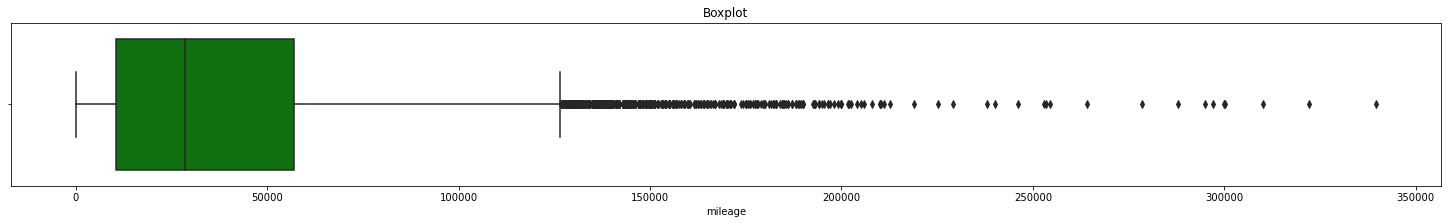

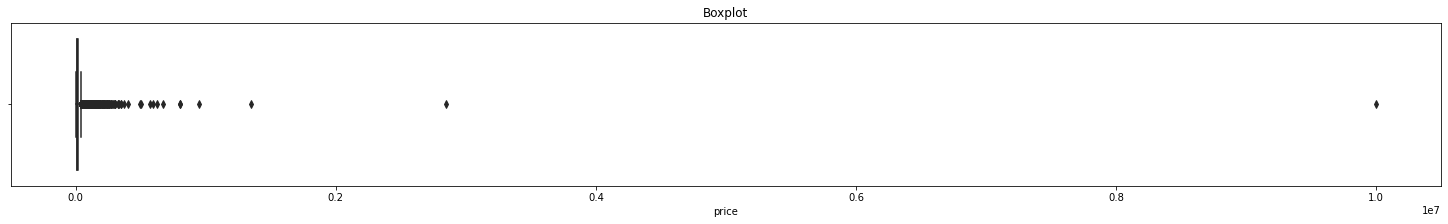

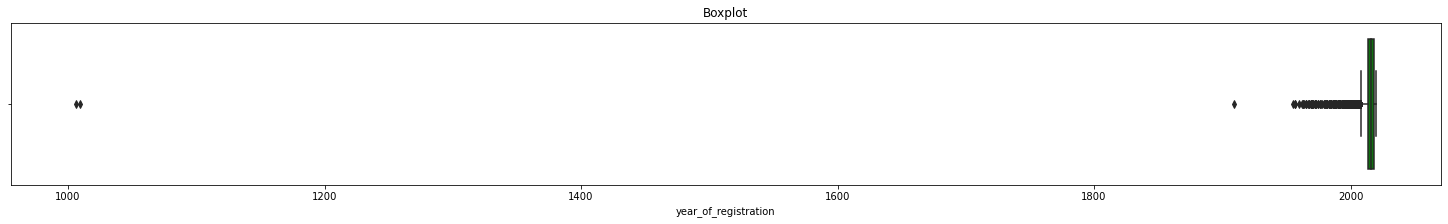

In [14]:
import matplotlib.pyplot as plt 
import seaborn as sns
for col in adverts_subset:
    fig, ax =plt.subplots(1, constrained_layout=True)
    fig.set_size_inches(20, 3)
    sns.boxplot(data = adverts[col], x= adverts[col], color='green').set(title="Boxplot")

In [15]:
#handle outliers for the given adverts subset
def handle_outliers(adverts, col_list):
    handle_new = adverts.copy()
    for col_name in col_list:
        # Calculate the first and third quartile of the column
        q1 = adverts[col_name].quantile(0.25)
        q3 = adverts[col_name].quantile(0.75)
        iqr = q3-q1 
        # Set the lower and upper bounds of the data
        fence_low  = q1-1.5*iqr
        fence_high = q3+1.5*iqr
        # Replace any values that fall outside the bounds with the bound values
        handle_new.loc[:,  col_name] = np.where(adverts[col_name]> fence_high, fence_high,
                                         np.where(adverts[col_name]< fence_low, fence_low,
                                                  adverts[col_name]))
    return handle_new
adverts = handle_outliers(adverts, adverts_subset)

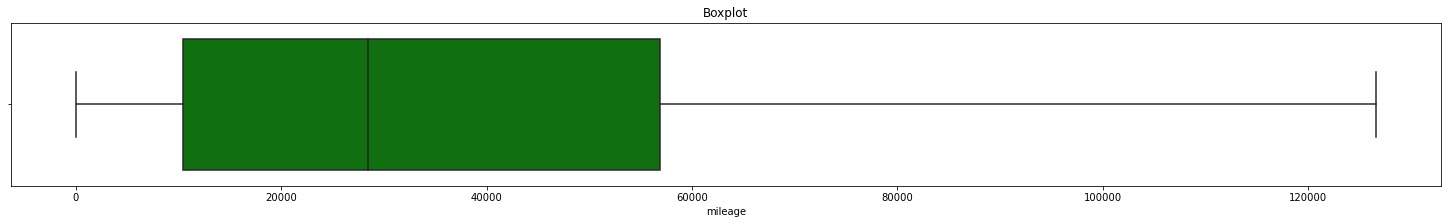

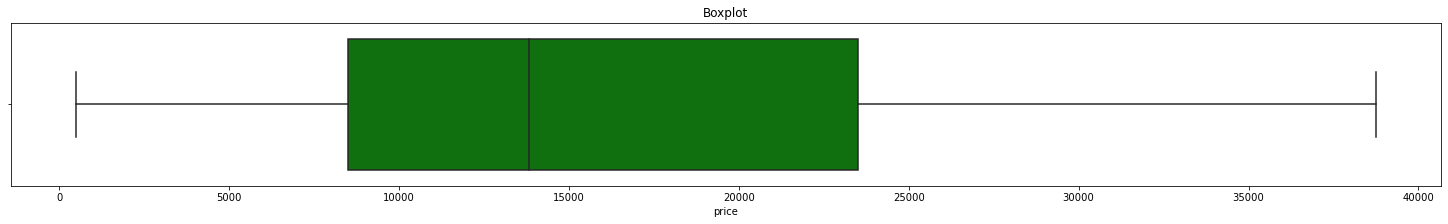

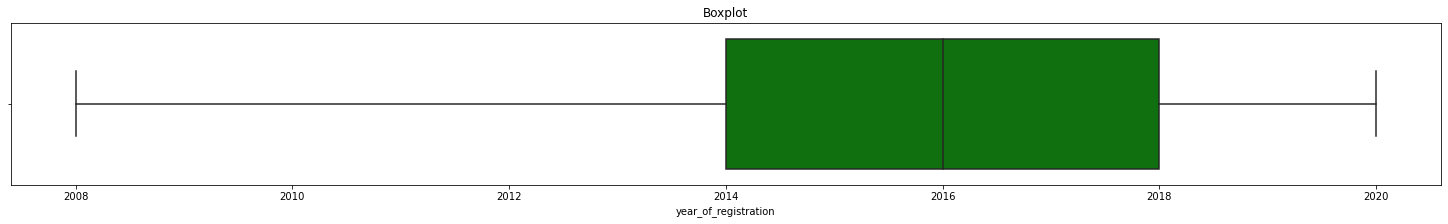

In [16]:
#display features with handled outliers
for col in adverts_subset:
    fig, ax =plt.subplots(1, constrained_layout=True)
    fig.set_size_inches(20, 3)
    sns.boxplot(data = adverts[col], x= adverts[col], color='green').set(title="Boxplot")

In [17]:
# output quantitative/numerical features
num_features = adverts.select_dtypes(include=['int64', 'float64'])

# output qualitative/categorical features
cat_features = adverts.select_dtypes(exclude=['int64', 'float64'])

In [18]:
num_features

,mileage,year_of_registration,price
0,42000.000,2017.0,16390.0
1,34014.000,2015.0,17000.0
2,22300.000,2017.0,16990.0
3,51907.000,2014.0,5495.0
4,934.000,2019.0,9995.0
...,...,...,...
40195,45000.000,2015.0,5295.0
40196,78000.000,2014.0,10790.0
40197,3732.000,2019.0,17999.0
40198,47924.000,2012.0,10995.0


In [19]:
cat_features

,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,body_type,crossover_car_and_van,fuel_type
0,17,White,Audi,Q2,USED,SUV,False,Diesel
1,65,Blue,Mercedes-Benz,E Class,USED,Convertible,False,Diesel
2,17,Grey,Audi,Q2,USED,SUV,False,Petrol
3,14,Black,Volkswagen,up!,USED,Hatchback,False,Petrol
4,69,Blue,Vauxhall,Crossland X,USED,SUV,False,Petrol
...,...,...,...,...,...,...,...,...
40195,65,Red,Citroen,C1,USED,Hatchback,False,Petrol
40196,14,Blue,Audi,A4 Avant,USED,Estate,False,Diesel
40197,69,Black,Kia,Sportage,USED,SUV,False,Petrol
40198,61,Silver,Audi,A5,USED,Coupe,False,Diesel


In [20]:
#Dropping reg_code table 
adverts = adverts.drop(['reg_code'], axis=1)
adverts.head()

,mileage,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,42000.0,White,Audi,Q2,USED,2017.0,16390.0,SUV,False,Diesel
1,34014.0,Blue,Mercedes-Benz,E Class,USED,2015.0,17000.0,Convertible,False,Diesel
2,22300.0,Grey,Audi,Q2,USED,2017.0,16990.0,SUV,False,Petrol
3,51907.0,Black,Volkswagen,up!,USED,2014.0,5495.0,Hatchback,False,Petrol
4,934.0,Blue,Vauxhall,Crossland X,USED,2019.0,9995.0,SUV,False,Petrol


In [21]:
corr = num_features.corr()

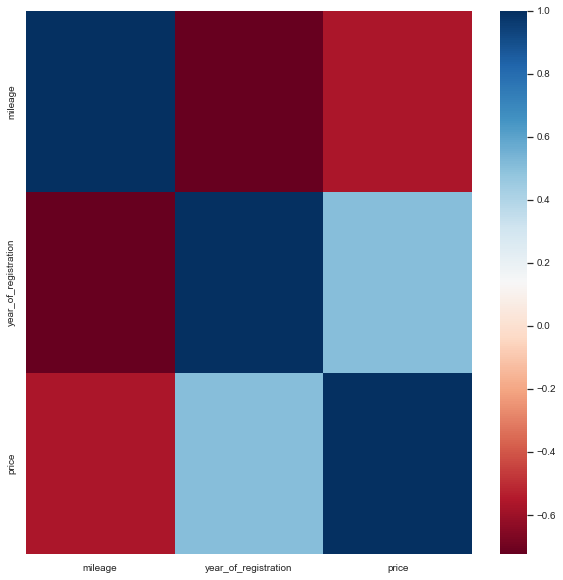

In [22]:
#creating a heatmap of the correlation matrix 
plt.figure(figsize=(10, 10))
sns.set(font_scale=.9)
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdBu')
plt.show()

In [23]:
num_features.corr()['price']

mileage                -0.562944
year_of_registration    0.507084
price                   1.000000
Name: price, dtype: float64

array([[<AxesSubplot:title={'center':'mileage'}>,
        <AxesSubplot:title={'center':'year_of_registration'}>],
       [<AxesSubplot:title={'center':'price'}>, <AxesSubplot:>]],
      dtype=object)

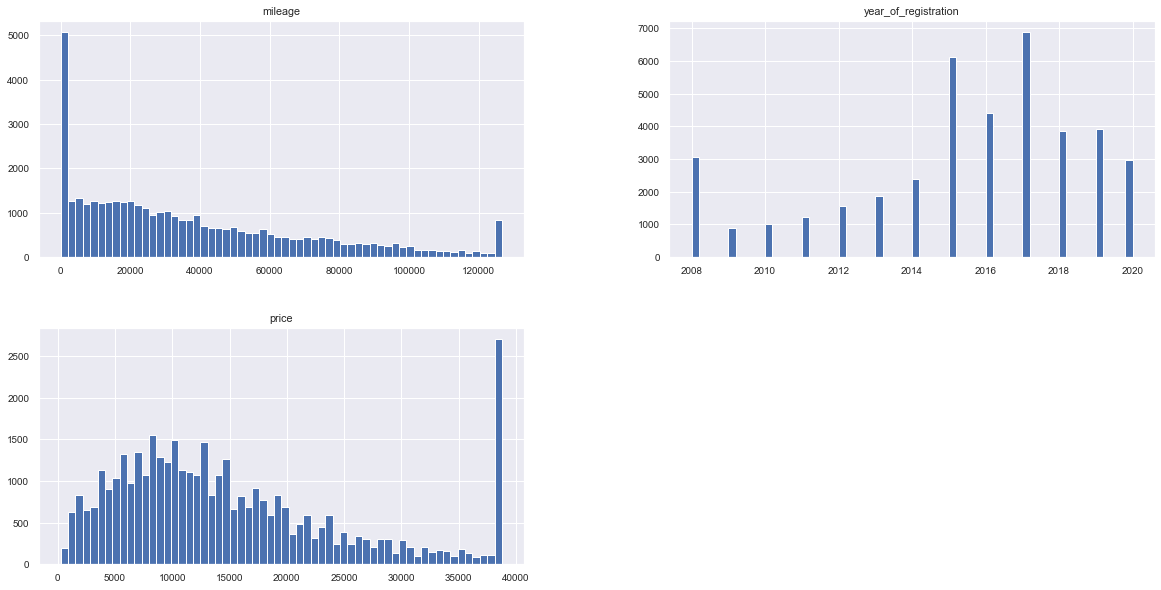

In [24]:
num_features.hist(bins=60, figsize=(20,10))

In [25]:
adverts.standard_make.unique()

array(['Audi', 'Mercedes-Benz', 'Volkswagen', 'Vauxhall', 'Dacia', 'Jeep',
       'Porsche', 'MINI', 'SEAT', 'SsangYong', 'Nissan', 'Citroen', 'BMW',
       'Fiat', 'Mazda', 'SKODA', 'Peugeot', 'Toyota', 'Kia', 'Suzuki',
       'Jaguar', 'Tesla', 'Hyundai', 'Renault', 'Mitsubishi',
       'Alfa Romeo', 'Lotus', 'Volvo', 'Honda', 'Land Rover',
       'Rolls-Royce', 'Lexus', 'Smart', 'Ferrari', 'MG', 'Bentley',
       'DS AUTOMOBILES', 'Chrysler', 'Lamborghini', 'Rover', 'Chevrolet',
       'Abarth', 'Infiniti', 'Subaru', 'Maserati', 'Aston Martin', 'LEVC',
       'McLaren', 'Saab', 'AK', 'CUPRA', 'Tiger', 'Austin', 'Morris',
       'Isuzu', 'London Taxis International', 'Caterham', 'Daewoo',
       'Daihatsu', 'TVR', 'International', 'Morgan', 'Corvette', 'Alpine',
       'Maybach', 'Cadillac', 'Triumph', 'Replica', 'Dodge', 'Proton',
       'Daimler', 'Jensen', 'Bugatti', 'GMC'], dtype=object)

In [26]:
adverts.standard_model.unique()

array(['Q2', 'E Class', 'up!', 'Crossland X', 'Duster', 'Compass', 'A1',
       'Panamera', 'Hatch', 'Arona', 'Polo', 'A3 Cabriolet', 'Golf',
       'Sandero', 'Tivoli', 'Pathfinder', 'Berlingo', 'Tiguan', 'Leaf',
       'ADAM', '4 Series', 'Punto', 'T-Cross', 'Insignia', 'Fox',
       'Mazda6', 'Mazda5', 'Citigo', '208', '6 Series', 'Corsa', 'Prius+',
       'GT-R', 'Qashqai', 'Picanto', '108', 'C-Zero', 'Leon', 'Vitara',
       'Astra', '1 Series', '3 Series', '2 Series', 'Transporter',
       'A Class', 'I-PACE', 'Mazda3', 'Arteon', 'Model S', 'Q5', '3008',
       'X4', '500', 'AYGO', 'Q3', 'i10', 'B Class', 'Yaris', 'Soul',
       'Stinger', 'Countryman', 'Clio', 'Outlander', 'MiTo', 'Fabia',
       'Qashqai+2', 'Grandland X', 'Tucson', 'Corolla Verso', 'Superb',
       'Elise', 'S Class', 'Ateca', 'Alto', 'A3', 'S1', 'Partner Tepee',
       'V40', 'Q7', 'Honda E', 'A4', 'Range Rover Evoque', 'Rio', 'X6',
       '206', 'Corolla', 'Mokka X', 'C Class', 'C3', 'Santa Fe',
       'Alha

In [27]:
adverts['standard_model'] = adverts['standard_model'].replace(['-'],['0'])
adverts.standard_model.value_counts()

Golf                  1133
Corsa                 1106
C Class                868
3 Series               852
1 Series               814
                      ... 
Diablo                   1
Ducato                   1
Alpina B3 Bi-Turbo       1
540C                     1
Rodeo                    1
Name: standard_model, Length: 798, dtype: int64

In [28]:
adverts.fuel_type.unique()

array(['Diesel', 'Petrol', 'Electric', 'Petrol Hybrid',
       'Petrol Plug-in Hybrid', 'Diesel Hybrid', 'Diesel Plug-in Hybrid',
       'Bi Fuel'], dtype=object)

<AxesSubplot:xlabel='fuel_type', ylabel='price'>

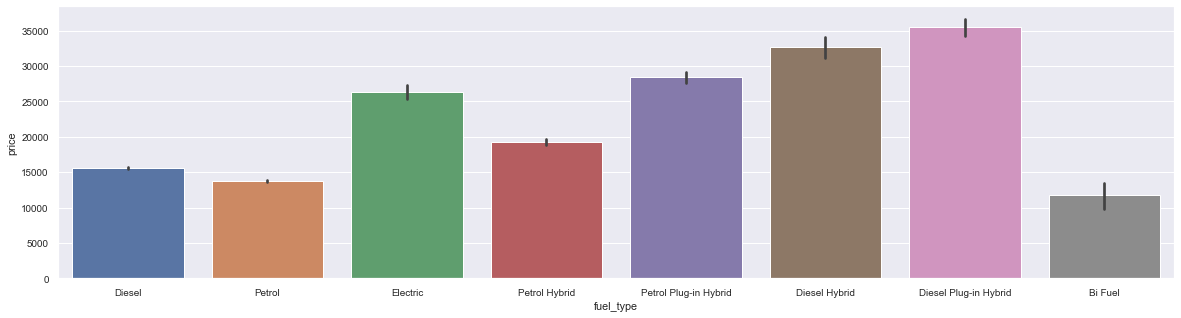

In [29]:
plt.figure(figsize=(20,5))
sns.barplot(data=adverts,y='price',x='fuel_type')

In [30]:
mean_fuel_price = adverts[['fuel_type', 'price']].groupby('fuel_type', as_index = False).mean()

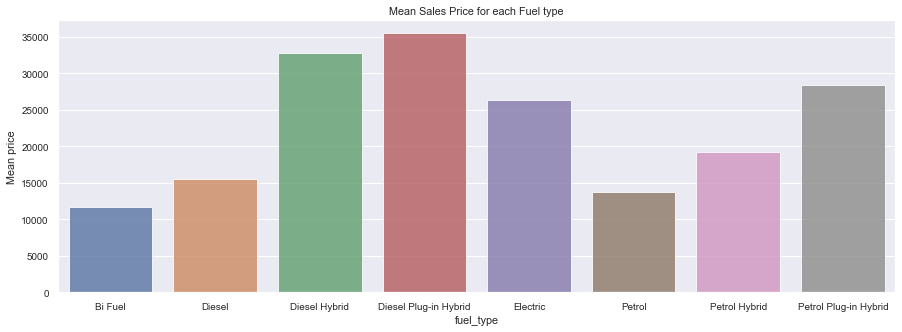

In [31]:
plt.figure(figsize = (15, 5))
sns.barplot(x=mean_fuel_price['fuel_type'], y=mean_fuel_price['price'], alpha = 0.8)
plt.title('Mean Sales Price for each Fuel type')
plt.ylabel('Mean price')
plt.show()

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X = adverts.drop(columns=['price'])
y = adverts['price']

In [34]:
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size= 0.25 ,random_state=42)

# FEATURE ENGINEERING


In [35]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from statsmodels.formula.api import ols
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [36]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest, f_regression

In [37]:
#selecting numerical features from training set
numerical_features = X_train.select_dtypes(exclude='object').columns.tolist()
#build transformation pipeline for numerical features
numerical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="median")), #replace missing values with median
        ("poly_int", PolynomialFeatures(degree=2, include_bias=False)), #creating polynomial interactions with 2 degrees
        ("scaler", StandardScaler()) #standardization of features
    ]
).set_output(transform='pandas')
print(numerical_features)
#display numerical transformer pipeline
numerical_transformer

['mileage', 'year_of_registration', 'crossover_car_and_van']


Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('poly_int', PolynomialFeatures(include_bias=False)),
                ('scaler', StandardScaler())])

In [38]:
#fitting and transforming numerical features using numerical transformer pipeline
numerical_transformer.fit_transform(X_train[numerical_features]).head()

,mileage,year_of_registration,crossover_car_and_van,mileage^2,mileage year_of_registration,mileage crossover_car_and_van,year_of_registration^2,year_of_registration crossover_car_and_van,crossover_car_and_van^2
9400,-0.056817,0.203524,-0.069275,-0.333857,-0.055384,-0.052196,0.202856,-0.069275,-0.069275
34163,-0.954095,1.396583,-0.069275,-0.666089,-0.954785,-0.052196,1.398267,-0.069275,-0.069275
6419,-0.580525,0.800053,-0.069275,-0.585822,-0.579989,-0.052196,0.800265,-0.069275,-0.069275
13670,-0.873184,1.098318,-0.069275,-0.655730,-0.873618,-0.052196,1.099192,-0.069275,-0.069275
18695,1.611818,-2.182594,-0.069275,1.554470,1.606941,-0.052196,-2.180857,-0.069275,-0.069275


In [39]:
#selecting categorical features from training set
categorical_features = X_train.select_dtypes(include='object').columns.tolist()
#pipeline transformation for categorical features
categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")), #replace missing columns/values with most frequent
        ("ohe", OneHotEncoder(handle_unknown="ignore", sparse_output=False, drop='if_binary')), #categorical encoding using one hot encoding
    ]
).set_output(transform='pandas')

In [40]:
#fitting and transforming categorical features using categorical transformer pipeline
categorical_transformer.fit_transform(X_train[categorical_features]).head()

,standard_colour_Beige,standard_colour_Black,standard_colour_Blue,standard_colour_Bronze,standard_colour_Brown,standard_colour_Burgundy,standard_colour_Gold,standard_colour_Green,standard_colour_Grey,standard_colour_Maroon,...,body_type_Saloon,body_type_Window Van,fuel_type_Bi Fuel,fuel_type_Diesel,fuel_type_Diesel Hybrid,fuel_type_Diesel Plug-in Hybrid,fuel_type_Electric,fuel_type_Petrol,fuel_type_Petrol Hybrid,fuel_type_Petrol Plug-in Hybrid
9400,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
34163,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6419,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
13670,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
18695,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [41]:
#combining numerical and categorical transformers 
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, numerical_features), 
        ("cat", categorical_transformer, categorical_features),
    ],
    remainder='passthrough', #allow remaining features passthrough
    verbose_feature_names_out=False
).set_output(transform="pandas")

In [42]:
#fitting and transforming preprocessor to the training data
preprocessor.fit_transform(X_train).head()

,mileage,year_of_registration,crossover_car_and_van,mileage^2,mileage year_of_registration,mileage crossover_car_and_van,year_of_registration^2,year_of_registration crossover_car_and_van,crossover_car_and_van^2,standard_colour_Beige,...,body_type_Saloon,body_type_Window Van,fuel_type_Bi Fuel,fuel_type_Diesel,fuel_type_Diesel Hybrid,fuel_type_Diesel Plug-in Hybrid,fuel_type_Electric,fuel_type_Petrol,fuel_type_Petrol Hybrid,fuel_type_Petrol Plug-in Hybrid
9400,-0.056817,0.203524,-0.069275,-0.333857,-0.055384,-0.052196,0.202856,-0.069275,-0.069275,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
34163,-0.954095,1.396583,-0.069275,-0.666089,-0.954785,-0.052196,1.398267,-0.069275,-0.069275,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6419,-0.580525,0.800053,-0.069275,-0.585822,-0.579989,-0.052196,0.800265,-0.069275,-0.069275,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
13670,-0.873184,1.098318,-0.069275,-0.655730,-0.873618,-0.052196,1.099192,-0.069275,-0.069275,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
18695,1.611818,-2.182594,-0.069275,1.554470,1.606941,-0.052196,-2.180857,-0.069275,-0.069275,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [43]:
from sklearn.base import BaseEstimator, TransformerMixin

In [44]:
regr_pipe = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("regr", Ridge(alpha=10))
    ]
).set_output(transform="pandas")

In [45]:
regr_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('poly_int',
                                                                   PolynomialFeatures(include_bias=False)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['mileage',
                                                   'year_of_registration',
                                                   'crossover_car_and_van']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['standard_colour',
                                                   'standard_make',
                                                   'standard_model',
                                                   'vehicle_condition',
                                                   'body_type', 'fuel_type'])],
                                   verbose_feature_names_out=False)),
                ('regr', Ridge(alpha=10))])

# FEATURE SELECTION AND DIMENSIONALITY REDUCTION 

In [47]:
from sklearn.decomposition import PCA
import seaborn as sns

In [48]:
regr_pipe = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("pca", PCA()), 
        ("featsel", SelectKBest(f_regression, k=10)),
        ("regr", Ridge(alpha=10))
    ]
).set_output(transform="pandas")

In [49]:
regr_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('poly_int',
                                                                   PolynomialFeatures(include_bias=False)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['mileage',
                                                   'year_of_registration',
                                                   'crossover_car_and_van']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(stra...ost_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['standard_colour',
                                                   'standard_make',
                                                   'standard_model',
                                                   'vehicle_condition',
                                                   'body_type', 'fuel_type'])],
                                   verbose_feature_names_out=False)),
                ('pca', PCA()),
                ('featsel',
                 SelectKBest(score_func=<function f_regression at 0x7f9349eb80d0>)),
                ('regr', Ridge(alpha=10))])

In [50]:
regr_pipe.named_steps['preprocessor'].get_feature_names_out()


array(['mileage', 'year_of_registration', 'crossover_car_and_van',
       'mileage^2', 'mileage year_of_registration',
       'mileage crossover_car_and_van', 'year_of_registration^2',
       'year_of_registration crossover_car_and_van',
       'crossover_car_and_van^2', 'standard_colour_Beige',
       'standard_colour_Black', 'standard_colour_Blue',
       'standard_colour_Bronze', 'standard_colour_Brown',
       'standard_colour_Burgundy', 'standard_colour_Gold',
       'standard_colour_Green', 'standard_colour_Grey',
       'standard_colour_Maroon', 'standard_colour_Multicolour',
       'standard_colour_Orange', 'standard_colour_Pink',
       'standard_colour_Purple', 'standard_colour_Red',
       'standard_colour_Silver', 'standard_colour_Turquoise',
       'standard_colour_White', 'standard_colour_Yellow',
       'standard_make_AK', 'standard_make_Abarth',
       'standard_make_Alfa Romeo', 'standard_make_Aston Martin',
       'standard_make_Audi', 'standard_make_Austin', 'standar

In [51]:
regr_pipe.named_steps['featsel'].get_support()

array([ True,  True,  True,  True, False,  True, False, False,  True,
       False, False, False,  True, False,  True, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [52]:
#Get the transformed features selected by SelectKBest
feature_transfromName= regr_pipe.named_steps['preprocessor'].get_feature_names_out()
selected_transformName= feature_transfromName[regr_pipe.named_steps['featsel'].get_support()]
selected_transformName

array(['mileage', 'year_of_registration', 'crossover_car_and_van',
       'mileage^2', 'mileage crossover_car_and_van',
       'crossover_car_and_van^2', 'standard_colour_Bronze',
       'standard_colour_Burgundy', 'standard_colour_Multicolour',
       'standard_make_Honda'], dtype=object)

<AxesSubplot:>

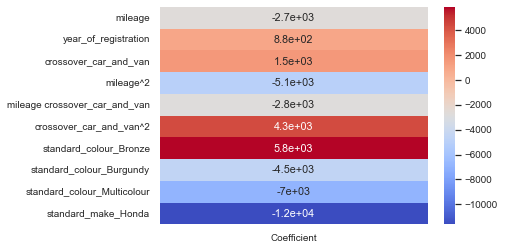

In [53]:
coefficients = pd.DataFrame(
    regr_pipe.named_steps['regr'].coef_, 
    index=selected_transformName,
    columns=['Coefficient']
)
sns.heatmap(coefficients, annot=True, cmap='coolwarm')

In [54]:
regr_pipe.score(X_test, y_test)

0.5934297599986175

# MODEL BUILDING

# Linear Model 

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

linear_regressor = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("pca", PCA()),
        ("featsel", SelectKBest(f_regression, k=10)),
        ("linear_regressor",LinearRegression())
    ]
).set_output(transform="pandas")

In [57]:
#hyperparameters to search over
param_grid = {
    "linear_regressor__copy_X": [True, False],
    "linear_regressor__fit_intercept": [True, False],
    "linear_regressor__n_jobs": [-1, None],
    "linear_regressor__positive": [True, False]
}

In [58]:
#create the grid search object
grid_search_lr = GridSearchCV(linear_regressor, param_grid=param_grid, cv=5, n_jobs=-1)

#fit the grid search to the training data
grid_search_lr.fit(X_train, y_train)

/Users/benny/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/benny/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/benny/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/benny/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/benny/opt/anaconda3/lib/python3.9

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('poly_int',
                                                                                          PolynomialFeatures(include_bias=False)),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['mileage',
                                                                          'year_of_registration',
                                                                          'crossover_car_and_van']),
                                                                        ('cat',
                                                                         Pipeline(steps=[(...
                                                          verbose_feature_names_out=False)),
                                       ('pca', PCA()),
                                       ('featsel',
                                        SelectKBest(score_func=<function f_regression at 0x7f9349eb80d0>)),
                                       ('linear_regressor',
                                        LinearRegression())]),
             n_jobs=-1,
             param_grid={'linear_regressor__copy_X': [True, False],
                         'linear_regressor__fit_intercept': [True, False],
                         'linear_regressor__n_jobs': [-1, None],
                         'linear_regressor__positive': [True, False]})

In [59]:
#derive the best estimator 
best_lr = grid_search_lr.best_estimator_
#make predictions based on best estimator
y_pred_lr = best_lr.predict(X_test)

#Calculate scores or r^2 and mae
r2_lr = r2_score(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)

print("Best parameters:", grid_search_lr.best_params_)
print("R-squared score:", r2_lr)
print("Mean absolute error:", mae_lr)

Best parameters: {'linear_regressor__copy_X': True, 'linear_regressor__fit_intercept': True, 'linear_regressor__n_jobs': -1, 'linear_regressor__positive': False}
R-squared score: 0.5934505148910159
Mean absolute error: 4868.8584748003595


# Random Forest 

In [60]:
from sklearn.ensemble import RandomForestRegressor

In [61]:
#define the pipeline for random forest regressor
rf_regressor = Pipeline([
    ('preprocessor', preprocessor),
    ('pca', PCA()),
    ('featsel', SelectKBest(f_regression, k=10)),
    ('regressor', RandomForestRegressor())
]).set_output(transform="pandas")

In [68]:
#define the parameter grid for grid search
param_grid = {
    'pca__n_components': [10, 20, 30],
    'regressor__n_estimators': [100, 200, 300],
    'regressor__max_depth': [None, 5, 10]
}

#perform grid search with cross-validation
grid_search_rf = GridSearchCV(rf_regressor, param_grid, cv=5, n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

/Users/benny/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/benny/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/benny/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/benny/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/benny/opt/anaconda3/lib/python3.9

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('poly_int',
                                                                                          PolynomialFeatures(include_bias=False)),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['mileage',
                                                                          'year_of_registration',
                                                                          'crossover_car_and_van']),
                                                                        ('cat',
                                                                         Pipeline(steps=[(...
                                                                          'standard_model',
                                                                          'vehicle_condition',
                                                                          'body_type',
                                                                          'fuel_type'])],
                                                          verbose_feature_names_out=False)),
                                       ('pca', PCA()),
                                       ('featsel',
                                        SelectKBest(score_func=<function f_regression at 0x7f9349eb80d0>)),
                                       ('regressor', RandomForestRegressor())]),
             n_jobs=-1,
             param_grid={'pca__n_components': [10, 20, 30],
                         'regressor__max_depth': [None, 5, 10],
                         'regressor__n_estimators': [100, 200, 300]})

In [69]:
#get the best performing model
best_rf = grid_search_rf.best_estimator_

In [70]:
#use the best RF model to predict the target variable for the test data
y_pred = best_rf.predict(X_test)

#calculate evaluation metrics for the test data
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

#print the evaluation metrics including best parameters
print("R-squared score:", r2)
print("Mean absolute error:", mae)
print("Best parameters:", grid_search_rf.best_params_)


R-squared score: 0.8275346142393136
Mean absolute error: 2672.0779726679752
Best parameters: {'pca__n_components': 30, 'regressor__max_depth': None, 'regressor__n_estimators': 300}


# Boosted Tree Regressor


In [71]:
from sklearn.ensemble import GradientBoostingRegressor

In [75]:
#define the parameter grid
param_grid = {
    'pca__n_components': [10, 20, 30],
    'regressor__n_estimators': [100, 200, 300],
    'regressor__max_depth': [None, 5, 10],
    'regressor__learning_rate': [0.1, 0.01, 0.001]
}

In [76]:
gb_regressor = Pipeline([
    ('preprocessor', preprocessor),
    ('pca', PCA()),
    ('featsel', SelectKBest(f_regression, k=10)),
    ('regressor', GradientBoostingRegressor())
]).set_output(transform="pandas")

In [77]:
#perform grid search with cross-validation
grid_search_gb = GridSearchCV(gb_regressor, param_grid, cv=5, n_jobs=-1)
grid_search_gb.fit(X_train, y_train)

/Users/benny/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/benny/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/benny/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/benny/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/benny/opt/anaconda3/lib/python3.9

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('poly_int',
                                                                                          PolynomialFeatures(include_bias=False)),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['mileage',
                                                                          'year_of_registration',
                                                                          'crossover_car_and_van']),
                                                                        ('cat',
                                                                         Pipeline(steps=[(...
                                                                          'fuel_type'])],
                                                          verbose_feature_names_out=False)),
                                       ('pca', PCA()),
                                       ('featsel',
                                        SelectKBest(score_func=<function f_regression at 0x7f9349eb80d0>)),
                                       ('regressor',
                                        GradientBoostingRegressor())]),
             n_jobs=-1,
             param_grid={'pca__n_components': [10, 20, 30],
                         'regressor__learning_rate': [0.1, 0.01, 0.001],
                         'regressor__max_depth': [None, 5, 10],
                         'regressor__n_estimators': [100, 200, 300]})

In [78]:
#get the best estimator 
best_gb = grid_search_gb.best_estimator_
y_pred_gb = best_gb.predict(X_test)

#calculate scores
r2_gb = r2_score(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)

print("Best parameters:", grid_search_gb.best_params_)
print("R-squared score:", r2_gb)
print("Mean absolute error:", mae_gb)

Best parameters: {'pca__n_components': 30, 'regressor__learning_rate': 0.1, 'regressor__max_depth': 10, 'regressor__n_estimators': 200}
R-squared score: 0.830957611300551
Mean absolute error: 2657.5151706307133


In [211]:
#dictionary with the results for each model/configuration
results = {
    'Linear Regression': {
        'MAE': 4868,
        'R2': 0.593
    },
    'Random Forest': {
        'MAE': 2672,
        'R2': 0.828
    },
    'Gradient Boosting': {
        'MAE': 2657,
        'R2': 0.831
    }
}

#dataframe from the dictionary
df_results = pd.DataFrame.from_dict(results, orient='index')

#display the dataframe
print(df_results)


                    MAE     R2
Linear Regression  4868  0.593
Random Forest      2672  0.828
Gradient Boosting  2657  0.831


In [244]:
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import StackingRegressor

# AVERAGER / VOTER ENSEMBLE 

In [218]:
#setting the voting regressor with the best models and set hyperparameters
voter = VotingRegressor(
    estimators=[('lr', best_lr),
    ('rf', best_rf),
    ('gb', best_gb)],
    n_jobs=-1)

In [219]:
voter.fit(X_train, y_train)

VotingRegressor(estimators=[('lr',
                             Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('poly_int',
                                                                                                PolynomialFeatures(include_bias=False)),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               ['mileage',
                                                                                'year_of_registration',
                                                                                'crossover_car_and_van']),
                                                                              ('cat',
                                                                               Pipeline(st...
                                                                                                              handle_unknown='ignore',
                                                                                                              sparse_output=False))]),
                                                                               ['standard_colour',
                                                                                'standard_make',
                                                                                'standard_model',
                                                                                'vehicle_condition',
                                                                                'body_type',
                                                                                'fuel_type'])],
                                                                verbose_feature_names_out=False)),
                                             ('pca', PCA(n_components=30)),
                                             ('featsel',
                                              SelectKBest(score_func=<function f_regression at 0x7f9349eb80d0>)),
                                             ('regressor',
                                              GradientBoostingRegressor(max_depth=10,
                                                                        n_estimators=200))]))],
                n_jobs=-1)

In [220]:
y_pred_voter = voter.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_voter)
r2 = r2_score(y_test, y_pred_voter)

print("R-squared score:", r2)
print("Mean absolute error:", mae)

R-squared score: 0.8069547534212735
Mean absolute error: 3067.118626081068


# Stacker Ensemble

In [248]:
stacker = StackingRegressor(
    estimators=[('lr', best_lr),
                ('rf', best_rf),
                ('gb', best_gb)],
    final_estimator=Ridge(alpha=10),
    n_jobs=-1
)

In [249]:
stacker.fit(X_train, y_train)

/Users/benny/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/benny/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/benny/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/benny/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/benny/opt/anaconda3/lib/python3.9

StackingRegressor(estimators=[('lr',
                               Pipeline(steps=[('preprocessor',
                                                ColumnTransformer(remainder='passthrough',
                                                                  transformers=[('num',
                                                                                 Pipeline(steps=[('imputer',
                                                                                                  SimpleImputer(strategy='median')),
                                                                                                 ('poly_int',
                                                                                                  PolynomialFeatures(include_bias=False)),
                                                                                                 ('scaler',
                                                                                                  StandardScaler())]),
                                                                                 ['mileage',
                                                                                  'year_of_registration',
                                                                                  'crossover_car_and_van']),
                                                                                ('cat',
                                                                                 Pipeline(...
                                                                                 ['standard_colour',
                                                                                  'standard_make',
                                                                                  'standard_model',
                                                                                  'vehicle_condition',
                                                                                  'body_type',
                                                                                  'fuel_type'])],
                                                                  verbose_feature_names_out=False)),
                                               ('pca', PCA(n_components=30)),
                                               ('featsel',
                                                SelectKBest(score_func=<function f_regression at 0x7f9349eb80d0>)),
                                               ('regressor',
                                                GradientBoostingRegressor(max_depth=10,
                                                                          n_estimators=200))]))],
                  final_estimator=Ridge(alpha=10), n_jobs=-1)

In [250]:
y_pred_stacker = stacker.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_stacker)
r2 = r2_score(y_test, y_pred_stacker)

print("R-squared score:", r2)
print("Mean absolute error:", mae)

R-squared score: 0.8331485178376066
Mean absolute error: 2616.646958317785


# MODEL EVALUATION

# cross validation 

In [238]:
from sklearn.model_selection import cross_val_score

In [252]:
models = {
    'Linear Regression': best_lr,
    'Random Forest Regression': best_rf,
    'Gradient Boosting Regression': best_gb,
    'Voter': voter,
    'Stacker': stacker
}

results = {} #initialize an empty dictionary to store the results
for model_name, model in models.items():
    #perform cross-validation on each model using negative root mean squared error as the scoring metric
    scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_root_mean_squared_error')
    mean_score = scores.mean()*-1 #calculate the mean RMSE and convert back to positive value
    std_score = scores.std()
    results[model_name] = [mean_score, std_score]

results_df = pd.DataFrame.from_dict(results, orient='index', columns=['Mean RMSE', 'Std RMSE'])
print(results_df)


/Users/benny/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/benny/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [1, 2, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/benny/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/benny/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/benny/opt/anaconda3/lib/python

                                Mean RMSE    Std RMSE
Linear Regression             6456.950219  107.305495
Random Forest Regression      4300.356098  143.421449
Gradient Boosting Regression  4262.327819  150.954159
Voter                         4538.157886  126.573435
Stacker                       4229.961200  142.365489


# True vs Predicted Analysis

In [253]:
xt = X.head(20)
pred1 = best_lr.predict(xt)
pred2 = best_rf.predict(xt)
pred3 = best_gb.predict(xt)
pred4 = best_voter.predict(xt)
pred5 = best_stacker.predict(xt)

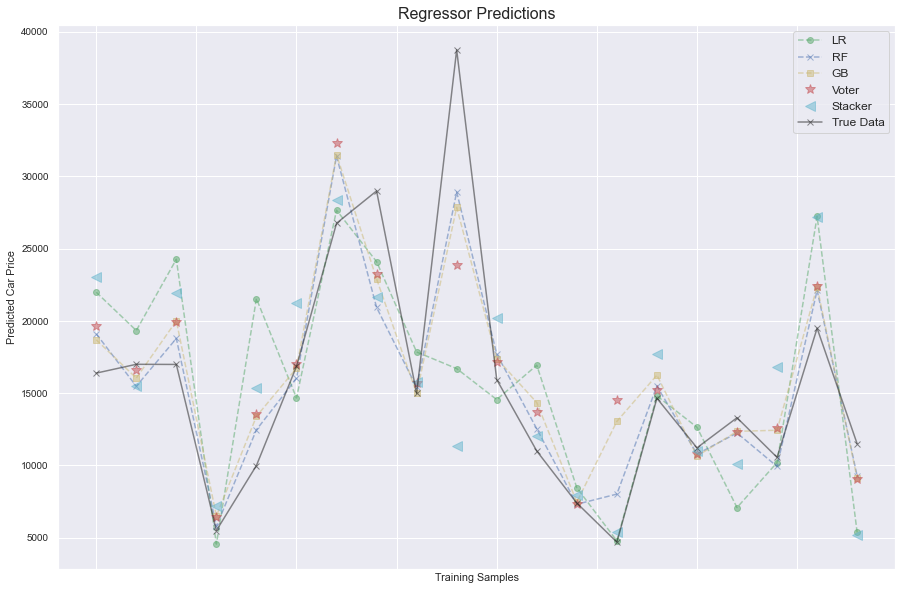

In [254]:
plt.figure(figsize=(15, 10))  

plt.plot(pred1, "go--", alpha=0.5, label="LR")  
plt.plot(pred2, "bx--", alpha=0.5, label="RF")  
plt.plot(pred3, "ys--", alpha=0.5, label="GB")  
plt.plot(pred4, "r*", alpha=0.5, ms=10, label="Voter")  
plt.plot(pred5, "c<", alpha=0.5, ms=10, label="Stacker")  
plt.plot(y.head(20), "kx-", alpha=0.5, label="True Data")  

plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
plt.ylabel("Predicted Car Price")
plt.xlabel("Training Samples")
plt.legend(loc="best", fontsize=12)
plt.title("Regressor Predictions", fontsize=16)

plt.show()

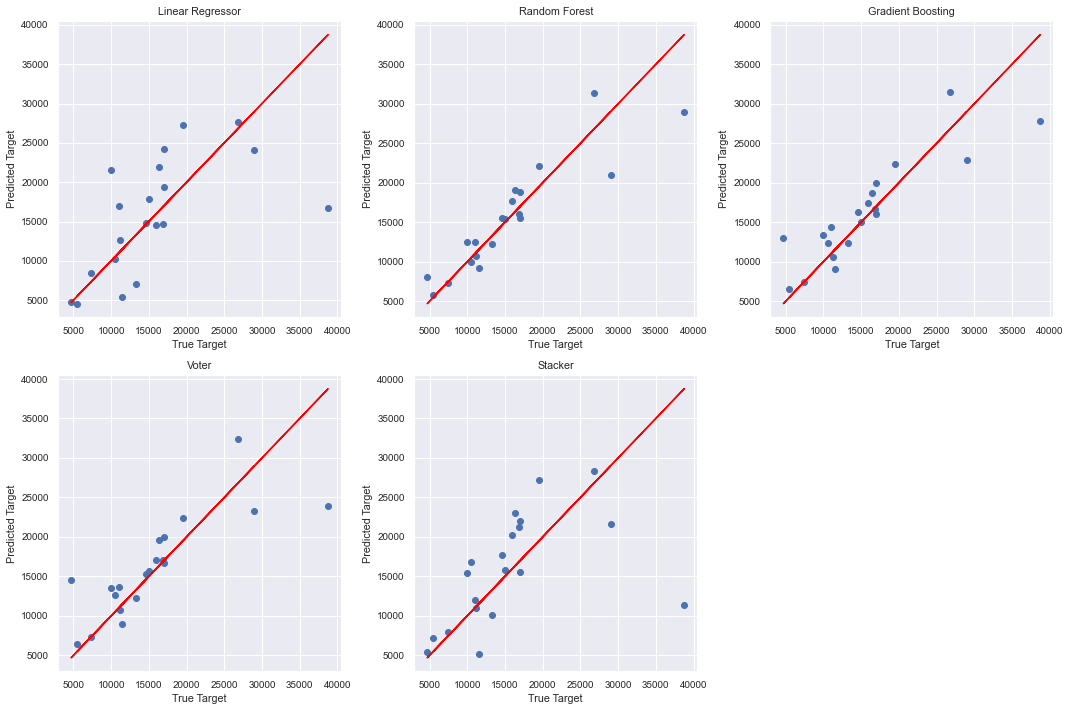

In [259]:
#creating a list of the predicted target values for each model
pred_list = [pred1, pred2, pred3, pred4, pred5]
model_names = ['Linear Regressor', 'Random Forest', 'Gradient Boosting', 'Voter', 'Stacker']

#plotting the true vs predicted target values for each model
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()
for i, ax in enumerate(axes):
    if i < len(pred_list):
        ax.scatter(y.head(20), pred_list[i])
        ax.plot(y.head(20), y.head(20), color='red')
        ax.set_title(model_names[i])
        ax.set_xlabel('True Target')
        ax.set_ylabel('Predicted Target')
    else:
        ax.axis('off')#turn off extra empty subplots if any
plt.tight_layout()
plt.show()

# SHAP

In [195]:
import shap

In [196]:
#apply the preprocessor on X_test
X_test_encoded = preprocessor.transform(X_test)

In [199]:
#create shap explainer object for the best perfoming model
explainer = shap.Explainer(best_gb['regressor'])

In [200]:
shap_values = explainer.shap_values(X_test_encoded)

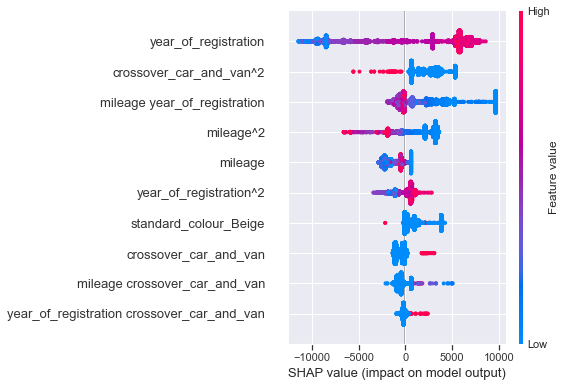

In [201]:
shap.summary_plot(shap_values, X_test_encoded, max_display=10)

In [202]:
shap.initjs()

In [203]:
shap.force_plot(explainer.expected_value, shap_values[0, :], X_test_encoded.iloc[[0]])

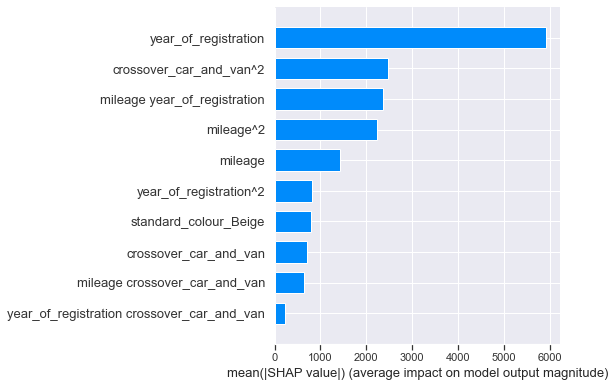

In [204]:
shap.summary_plot(shap_values, X_test_encoded, plot_type="bar", max_display=10)

# Partial Dependency Plots

In [205]:
from sklearn.inspection import PartialDependenceDisplay

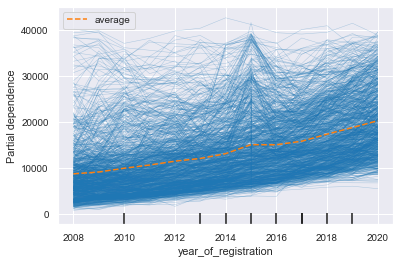

In [207]:
PartialDependenceDisplay.from_estimator(
    best_gb, X_test, features=['year_of_registration'], kind='both'
);

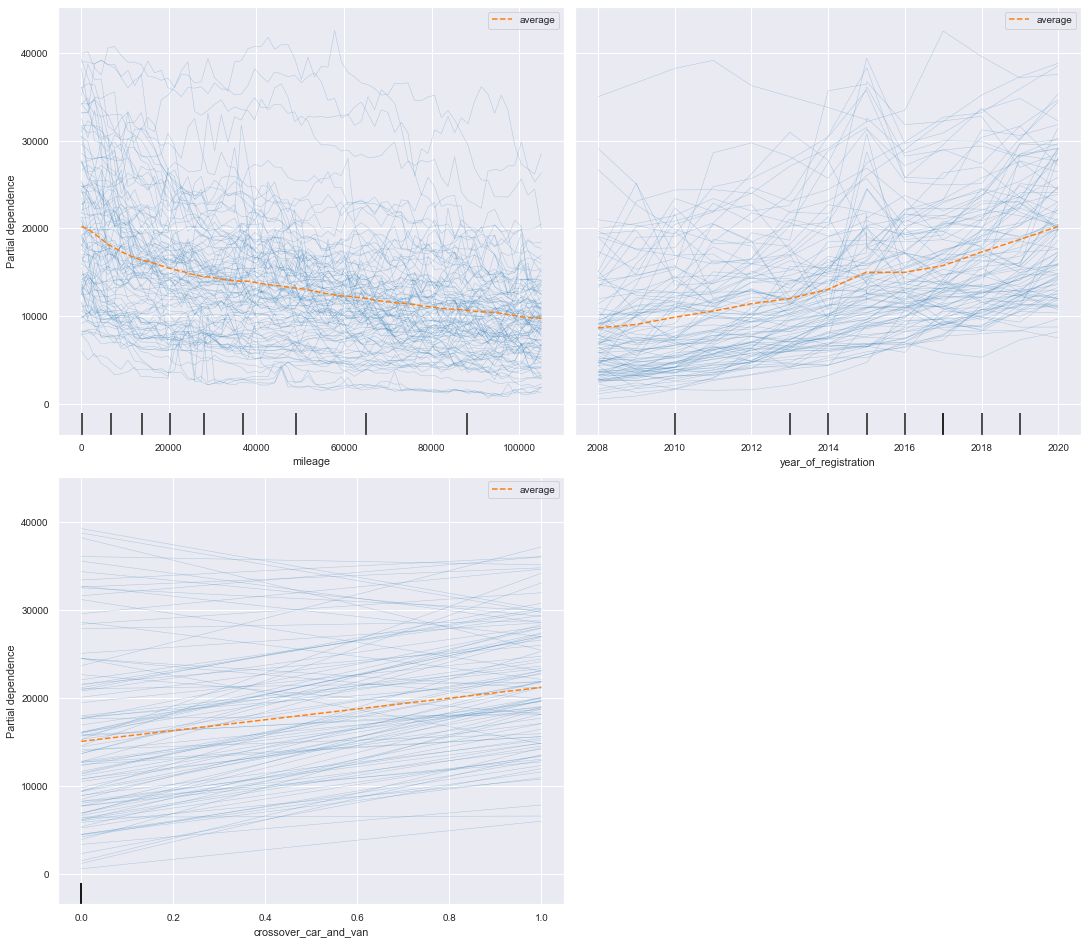

In [264]:
fig, ax = plt.subplots(figsize=(15,13), constrained_layout=True)
PartialDependenceDisplay.from_estimator(
    best_gb, X_test, features=X_test.select_dtypes(exclude='object').columns,
    kind='both',
    subsample=100, grid_resolution=70, n_jobs=1, random_state=0,
    ax=ax, n_cols=2
)